In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import random
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [3]:
!ls

Sample_submission.csv test
classificatin.ipynb   train


In [4]:
names = []
nums = []
data = {'Name of Class':[],'Number of samples':[]}

for i in os.listdir('./train'):
    if(i=='.DS_Store'):
        continue
    nums.append(len(os.listdir('./train/'+i)))
    names.append(i)
data['Name of Class']+=names
data['Number of samples']+=nums
df = pd.DataFrame(data)
df

Name of Class  Number of samples
0           cat                700
1           dog                900
2         horse                600
3          deer                600

<Axes: xlabel='Name of Class', ylabel='Number of samples'>

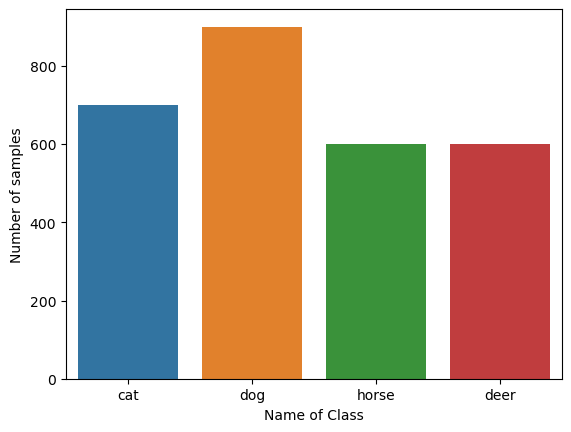

In [5]:
sns.barplot(x=df["Name of Class"],y=df["Number of samples"])

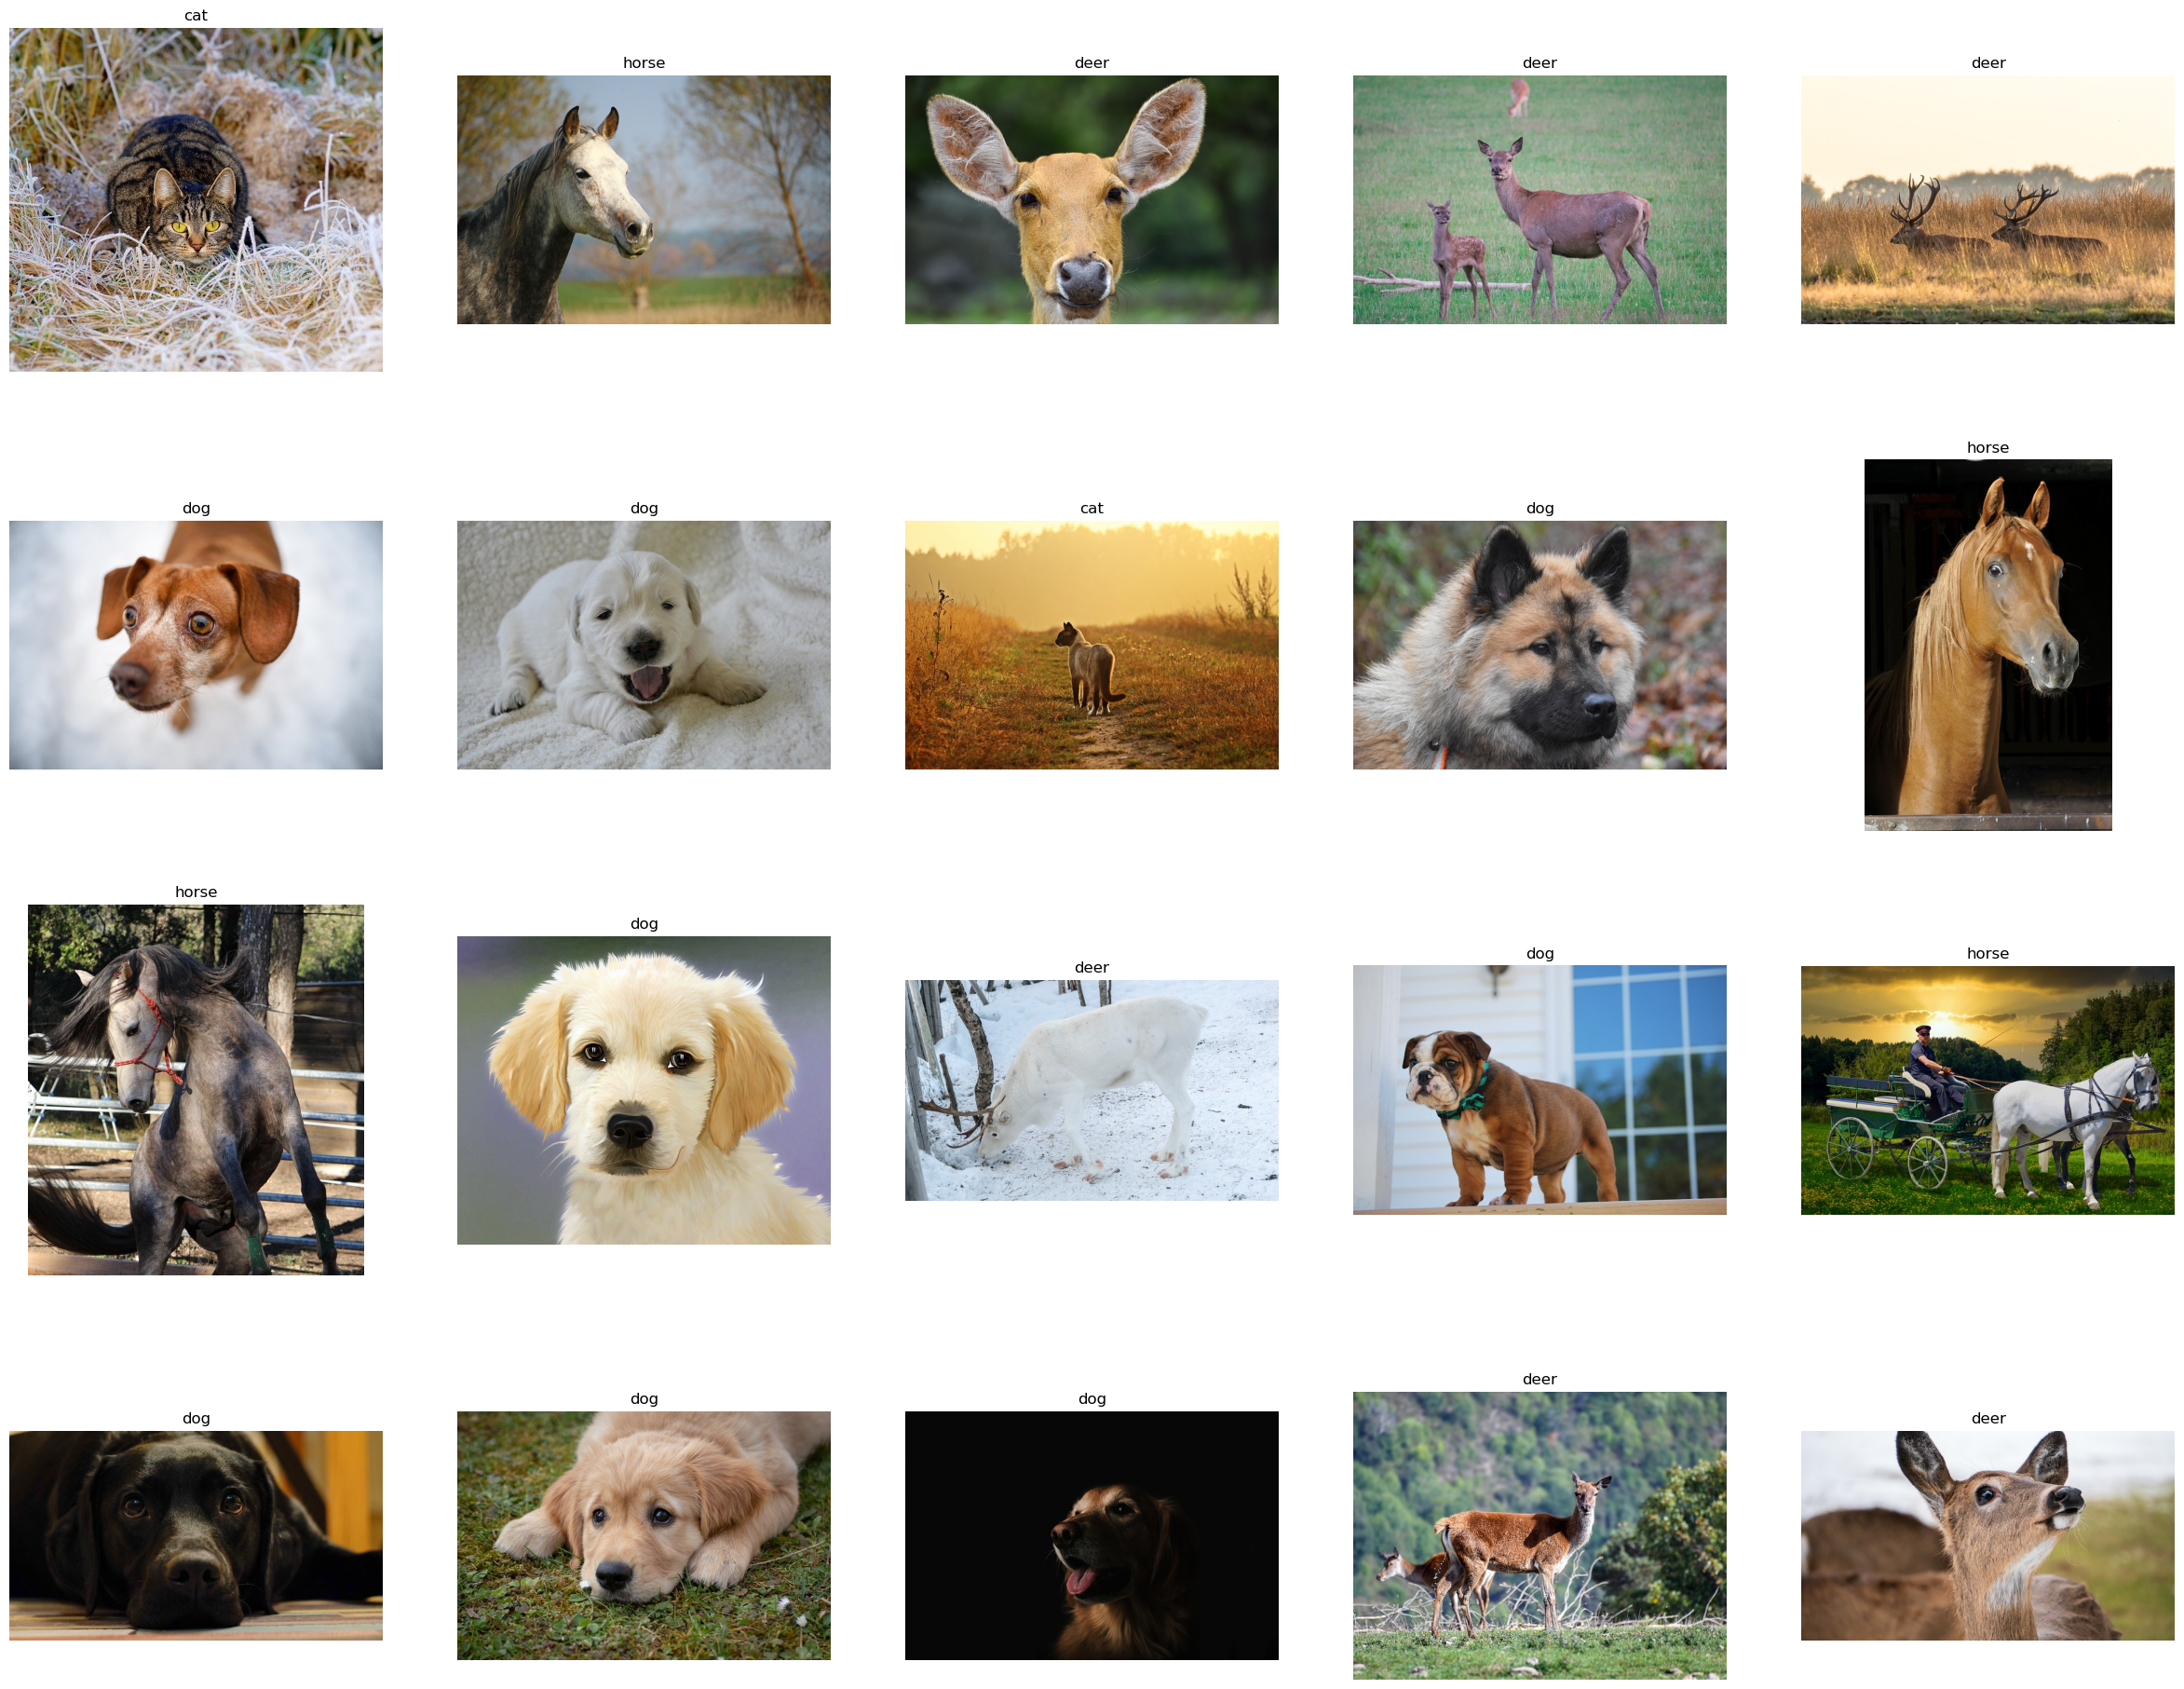

In [6]:
classes = os.listdir('./train')
plt.figure(figsize=(30,30))
for i in range(20):
    x = random.randint(0,len(classes)-1)
    if(classes[x]=='.DS_Store'):
        continue
    images = os.listdir('./train/'+classes[x])
    j = random.randint(0,600)
    image = cv2.imread('./train/'+classes[x]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(classes[x])
    plt.axis('off')
plt.show()

In [7]:
image_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,validation_split=0.2)

In [8]:
train_ds = image_data.flow_from_directory(
    './train',
    subset = 'training',
    target_size = (224 , 224),
    batch_size=32
)
valid_ds = image_data.flow_from_directory(
    './train',
    subset = 'validation',
    target_size = (224 , 224),
    batch_size = 32
)

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


Building the Model

In [12]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),include_top = False,weights = 'imagenet')
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax',name = 'classification'))

In [13]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005,momentum = 0.9),loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [14]:
output = model.fit(train_ds , validation_data = valid_ds , epochs = 10)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4394 - loss: 1.2650 - val_accuracy: 0.8536 - val_loss: 0.4866
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8942 - loss: 0.4078 - val_accuracy: 0.9036 - val_loss: 0.2963
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9344 - loss: 0.2380 - val_accuracy: 0.9357 - val_loss: 0.2112
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9503 - loss: 0.1684 - val_accuracy: 0.9446 - val_loss: 0.1877
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9469 - loss: 0.1621 - val_accuracy: 0.9411 - val_loss: 0.1743
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9633 - loss: 0.1225 - val_accuracy: 0.9375 - val_loss: 0.1665
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9661 - loss: 0.1193 - val_accuracy: 0.9554 - val_loss: 0.1461
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9734 - loss: 0.1009 - val_accuracy: 0.9518 - val_loss: 0.

In [15]:
model.evaluate(valid_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.9464 - loss: 0.1598


[0.1686653047800064, 0.9464285969734192]

In [16]:
!ls

Sample_submission.csv test
classificatin.ipynb   train


In [17]:
sub_csv = './Sample_submission.csv'
path_test = './test/test'

In [18]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

ID  Label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0
5   6      0
6   7      0
7   8      0
8   9      0
9  10      0

In [20]:
from tensorflow.keras.preprocessing.image import load_img
labels = []
for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg',target_size=(224, 224))
    img = np.array(image)
    img = img/255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    labels.append(label_id.index(max(label_id)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

In [22]:
df_sub['Label'] = labels

In [23]:
df_sub.to_csv('Sample_submission.csv',index=False)